In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, Input, MaxPooling2D
from tensorflow.keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow_addons as tfa
from tensorflow.keras.callbacks import ModelCheckpoint
import plotly.express as px
from numpy import expand_dims

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Kompjuterski vid/Projekat/dataset1/sign_mnist_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Kompjuterski vid/Projekat/dataset1/sign_mnist_test.csv")

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Kompjuterski vid/Projekat/dataset1/sign_mnist_test.csv")
y = test['label']

In [ ]:
labele = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
labele1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

In [ ]:
y_train_brojevi = train_df['label']
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [ ]:
x_train = train_df.values
x_test = test_df.values

In [ ]:
x_train_grayscale = x_train.reshape(-1,28,28,1)
x_test_grayscale = x_test.reshape(-1,28,28,1)

In [ ]:
from collections import Counter
Counter(y_train_brojevi[:100])

Counter({3: 5,
         6: 4,
         2: 8,
         13: 5,
         16: 10,
         8: 2,
         22: 3,
         18: 7,
         10: 5,
         20: 2,
         17: 2,
         19: 4,
         21: 5,
         23: 4,
         24: 1,
         1: 3,
         12: 3,
         11: 4,
         15: 4,
         4: 4,
         0: 5,
         5: 2,
         7: 3,
         14: 5})

***Grayscale slike - iscrtavanje***

<ipython-input-78-19ee270c8033>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(4,6, i)


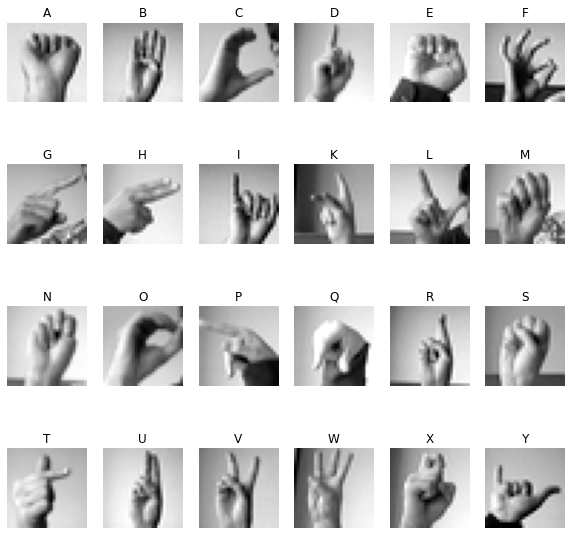

In [ ]:
plt.figure(figsize=(10, 10))
for i in labele1:
  if(i>=9):
    ax = plt.subplot(4,6, i)
    for j in range(100):
      if(i==y_train_brojevi[j]):
        if(i>=9):
          plt.title(labele[i-1])
        else:
          plt.title(labele[i])
        plt.imshow(x_train[j].reshape(28,28), cmap='gray')
        break
  else:
     ax = plt.subplot(4,6, i + 1)
     for j in range(100):
      if(i==y_train_brojevi[j]):
        if(i>=9):
          plt.title(labele[i-1])
        else:
          plt.title(labele[i])
        plt.imshow(x_train[j].reshape(28,28), cmap='gray')
        break
        
  plt.axis("off")

***RGB slike - iscrtavanje***

In [ ]:
images = tf.convert_to_tensor(x_train_grayscale, dtype=tf.uint8)
x_train_rgb = tf.image.grayscale_to_rgb(images,name=None)

images1 = tf.convert_to_tensor(x_test_grayscale, dtype=tf.uint8)
x_test_rgb = tf.image.grayscale_to_rgb(images1,name=None)

<ipython-input-80-503469b68a42>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(4,6, i)


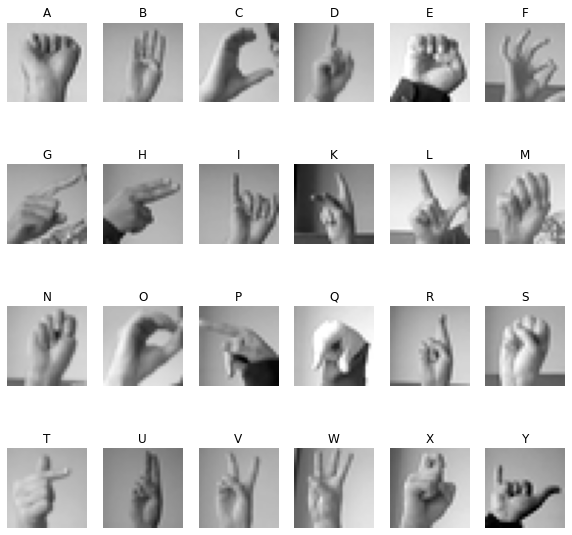

In [ ]:
plt.figure(figsize=(10, 10))
for i in labele1:
  if(i>=9):
    ax = plt.subplot(4,6, i)
    for j in range(100):
      if(i==y_train_brojevi[j]):
        if(i>=9):
          plt.title(labele[i-1])
        else:
          plt.title(labele[i])
        plt.imshow(x_train_rgb[j])
        break
  else:
     ax = plt.subplot(4,6, i + 1)
     for j in range(100):
      if(i==y_train_brojevi[j]):
        if(i>=9):
          plt.title(labele[i-1])
        else:
          plt.title(labele[i])
        plt.imshow(x_train_rgb[j])
        break
        
  plt.axis("off")